#Creating VGG16 model for dataset

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from pneumonia.ml_logic.preprocessor import train_generator, val_generator, test_generator
from pneumonia.ml_logic.baseline import compile, fitting
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import Input

from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16

In [3]:
def vgg16():
    # Create VGG16 model 
    vgg16 = VGG16(input_shape=(256,256,3),include_top=False,weights='imagenet')
    vgg16.trainable = False
    
    input_dim = (256,256,3)
    scale = (1./255.)
    model = Sequential([
        vgg16,
        Input(shape=input_dim),
        Rescaling(scale),
        Flatten(),
        Dense(32, activation="relu"),
        #Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    return model

In [4]:
#Instantiate the model
vgg16_model = vgg16()

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-27 11:56:23.630699: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 11:56:23.631079: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
compile(vgg16_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 rescaling (Rescaling)       (None, 8, 8, 512)         0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1048608   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15,763,329
Trainable params: 1,048,641
Non

In [6]:
# # Fit the model
history_vgg16 = fitting(vgg16_model, use_multiprocessing=False)

Found 4716 files belonging to 2 classes.
Found 604 files belonging to 2 classes.
Epoch 1/20


2023-03-27 11:56:26.154569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-27 11:56:26.514191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9521 - recall: 0.9447

2023-03-27 11:57:12.359974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 52s 346ms/step - loss: 0.0447 - accuracy: 0.9521 - recall: 0.9447 - val_loss: 0.1429 - val_accuracy: 0.9404 - val_recall: 0.9596
Epoch 2/20
148/148 [==============================] - 55s 368ms/step - loss: 0.0136 - accuracy: 0.9869 - recall: 0.9837 - val_loss: 0.1613 - val_accuracy: 0.9454 - val_recall: 0.9843
Epoch 3/20
148/148 [==============================] - 61s 403ms/step - loss: 0.0062 - accuracy: 0.9966 - recall: 0.9956 - val_loss: 0.1644 - val_accuracy: 0.9421 - val_recall: 0.9865
Epoch 4/20
148/148 [==============================] - 51s 343ms/step - loss: 0.0032 - accuracy: 0.9992 - recall: 0.9988 - val_loss: 0.2072 - val_accuracy: 0.9321 - val_recall: 0.9910
Epoch 5/20
148/148 [==============================] - 50s 331ms/step - loss: 0.0018 - accuracy: 0.9996 - recall: 0.9994 - val_loss: 0.1843 - val_accuracy: 0.9387 - val_recall: 0.9865
Epoch 6/20
148/148 [==============================] - 50s 333ms/step - loss: 0.0012 - accuracy: 

In [7]:
model, history = history_vgg16

Text(0.5, 1.0, 'Accuracy Evolution')

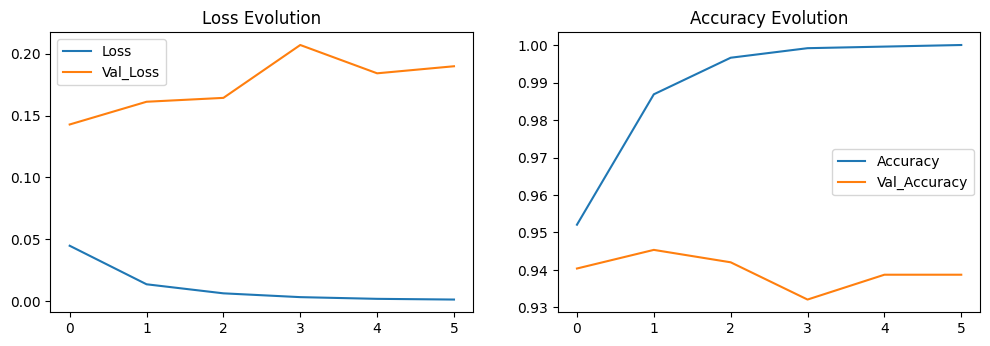

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')